In [5]:
import numpy as np
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw
import itertools
from tqdm.notebook import tqdm
from ants.model import AntWorld
from ants.agent import Environment, Ant, Food, Home, Predator
from ants.config import WIDTH, HEIGHT, EVAPORATE, DIFFUSION, INITDROP, LOWERBOUND, PROB_RANDOM, DROP_RATE, DECAY_RATE, MAX_STEPS_WITHOUT_FOOD, BIRTH_RATE, CONSUMPTION_RATE, CARRYING_CAPACITY, NUM_PREDATORS, NUM_FOOD_LOCS, NUM_ANTS, MAX_STEPS_WITHOUT_ANTS, REPRODUCTION_THRESHOLD, PREDATOR_LIFETIME

import warnings
warnings.filterwarnings('ignore')

In [26]:
def run_simulation(params, max_steps, output_dir="simulation_results"):
    os.makedirs(output_dir, exist_ok=True)
    
    model = AntWorld(**params)
    
    meal_sizes = []
    ant_population = []
    predator_population = []
    
    for step in tqdm(range(max_steps), desc="Simulation Progress", unit="step"):
        model.step()
        ant_population.append(len([agent for agent in model.schedule.agents if isinstance(agent, Ant)]))
        predator_population.append(len([agent for agent in model.schedule.agents if isinstance(agent, Predator)]))

        if not model.running:
            break
    
    for agent in model.all_predators:
        if isinstance(agent, Predator):
            meal_sizes.extend(agent.meal_sizes)
    
    run_id = f"run_{len(os.listdir(output_dir)) + 1:03d}"
    run_dir = os.path.join(output_dir, run_id)
    os.makedirs(run_dir, exist_ok=True)
    
    with open(os.path.join(run_dir, "metadata.json"), "w") as f:
        json.dump(params, f, indent=4)
    
    np.save(os.path.join(run_dir, 'meal_sizes.npy'), meal_sizes)
    np.save(os.path.join(run_dir, 'ant_population.npy'), ant_population)
    np.save(os.path.join(run_dir, 'predator_population.npy'), predator_population)

    print(f"Simulation saved to {run_dir}")

### Set parameters

In [27]:
folder = "simulation_results"

max_steps = 10000
repetitions = 10

params = {
    "height": HEIGHT,
    "width": WIDTH,
    "evaporate": EVAPORATE,
    "diffusion": DIFFUSION,
    "initdrop": INITDROP,
    "lowerbound": LOWERBOUND,
    "prob_random": PROB_RANDOM,
    "drop_rate": DROP_RATE,
    "decay_rate": DECAY_RATE,
    "max_steps_without_food": MAX_STEPS_WITHOUT_FOOD,
    "birth_rate": BIRTH_RATE,
    "consumption_rate": CONSUMPTION_RATE,
    "carrying_capacity": CARRYING_CAPACITY,
    "num_predators": NUM_PREDATORS,
    "num_food_locs": NUM_FOOD_LOCS,
    "num_ants": NUM_ANTS,
    "max_steps_without_ants": MAX_STEPS_WITHOUT_ANTS,
    "reproduction_threshold": REPRODUCTION_THRESHOLD,
    "predator_lifetime": PREDATOR_LIFETIME
}

### Run simulations

In [28]:
for rep in tqdm(range(1,repetitions+1), desc="Running simulations"):
    run_simulation(params, max_steps, output_dir=folder)

Running simulations:   0%|          | 0/10 [00:00<?, ?it/s]

Making World


Simulation Progress:   0%|          | 0/10000 [00:00<?, ?step/s]

Stopping: No predators left
Simulation saved to simulation_results\run_011
Making World


Simulation Progress:   0%|          | 0/10000 [00:00<?, ?step/s]

AttributeError: 'Predator' object has no attribute 'meals_eaten'

### Load simulation results (and plot results)

In [25]:
#open f"{run_dir}/meal_sizes.npy
run_dir = f"{folder}/run_{str(4).zfill(3)}"
print(run_dir)
np.load(f"{run_dir}/meal_sizes.npy")

simulation_results/run_004


array([], dtype=float64)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


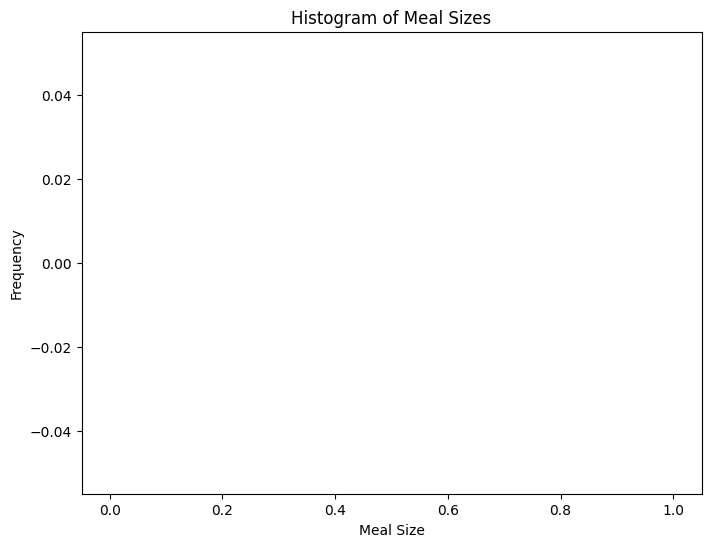

In [17]:
meal_sizes = []

for run in range(1,repetitions+1):
    run_dir = f"{folder}/run_{str(run).zfill(3)}"
    #print (f"{run_dir}/meal_sizes.npy")
    print(np.load(f"{run_dir}/meal_sizes.npy"))
    meal_sizes.extend(np.load(f"{run_dir}/meal_sizes.npy"))

meal_sizes = [meal for meal in meal_sizes if meal > 0]

plt.figure(figsize=(8, 6))
plt.hist(meal_sizes, bins=50, density=False, color='blue', alpha=0.7)
plt.xlabel('Meal Size')
plt.ylabel('Frequency')
plt.title('Histogram of Meal Sizes')
plt.show()

### Fit powerlaw

In [10]:
fit = powerlaw.Fit(meal_sizes)

alpha = fit.alpha
print(f"Estimated alpha: {alpha}")

R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Log-likelihood ratio: {R}")
print(f"P-value for comparison: {p}")
    
if p < 0.05:
    print("Power law fit is better than exponential fit")
else:
    print("Exponential fit is as good or better than power law fit")

plt.figure(figsize=(8, 6))
fit.plot_pdf(color='blue', linestyle='-', marker='o', label='Empirical Data')
fit.power_law.plot_pdf(color='red', linestyle='--', label='Power Law Fit')
plt.xlabel("Meal size")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

Calculating best minimal value for power law fit
Estimated alpha: nan


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits found.
Not enough data. Returning nan


Log-likelihood ratio: 0
P-value for comparison: 1
Exponential fit is as good or better than power law fit


ValueError: max() arg is an empty sequence

<Figure size 800x600 with 0 Axes>